In [18]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.svm import SVR

#from sklearn.model_selection import train_test_split, GridSearchCV




In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('E:\ineuron_test\ml_code\ml_Q2\Bengaluru_House_Data.csv')

# Display the first few rows
print(df.head())

In [11]:
# Descriptive statistics
print(df.describe())

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [12]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [13]:
# Check missing values
print(df.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [16]:
for col in df.columns:
    print(df[col].value_counts())
    print("*"*20)

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
16-Oct               1
15-Dec               1
15-Jun               1
16-Jul               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         4931
3 BHK        

In [14]:
df.duplicated().sum()

529

In [15]:
df = df.drop_duplicates()
df.shape

(12791, 9)

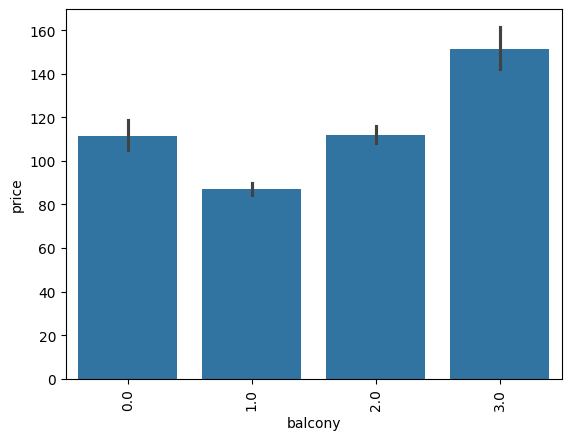

In [19]:
sns.barplot(x=df['balcony'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

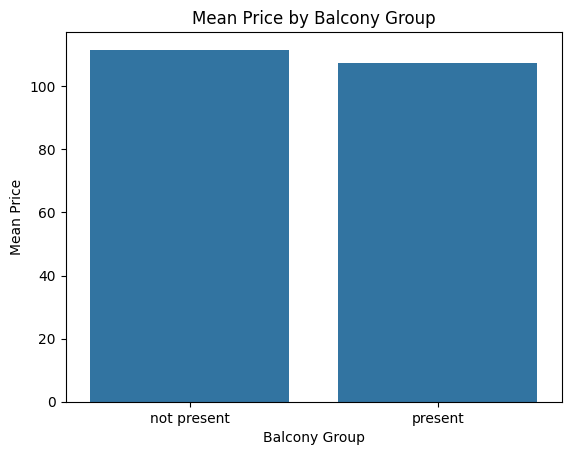

In [20]:
df['grouped_balcony'] = df['balcony'].apply(lambda x: 'present' if x in [1.0, 2.0, 3.0] else 'not present' if x==0.0 else None)
grouped_df = df.groupby('grouped_balcony')['price'].mean().reset_index()

# Plotting the bar plot
sns.barplot(x=grouped_df['grouped_balcony'], y=grouped_df['price'])
plt.xlabel('Balcony Group')
plt.ylabel('Mean Price')
plt.title('Mean Price by Balcony Group')
plt.show()

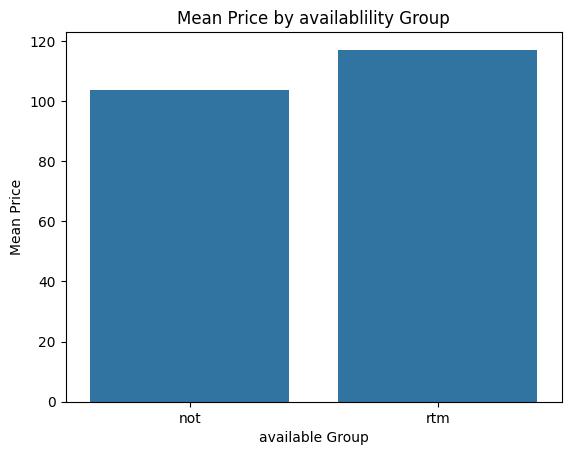

In [21]:
df['grouped_available'] = df['availability'].apply(lambda x: 'rtm' if x=='Ready To Move' else 'not')
grouped_df = df.groupby('grouped_available')['price'].mean().reset_index()

# Plotting the bar plot
sns.barplot(x=grouped_df['grouped_available'], y=grouped_df['price'])
plt.xlabel('available Group')
plt.ylabel('Mean Price')
plt.title('Mean Price by availablility Group')
plt.show()

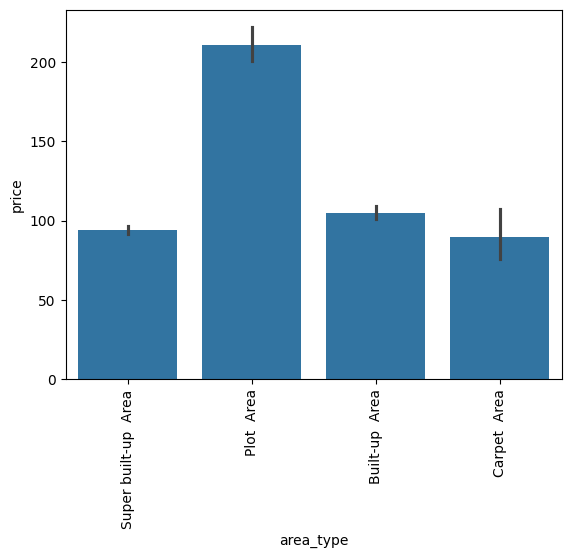

In [22]:
sns.barplot(x=df['area_type'], y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

In [23]:
df.drop(columns = ['balcony','society', 'grouped_balcony', 'grouped_available'], axis=1, inplace=True)

In [24]:
df.describe()

,bath,price
count,12718.000000,12791.000000
mean,2.708602,114.317646
std,1.357764,151.480310
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,73.000000
75%,3.000000,121.000000
max,40.000000,3600.000000


In [25]:
df['location'].value_counts()

Whitefield                        523
Sarjapur  Road                    379
Electronic City                   287
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [26]:
df['location'] = df['location'].fillna('Sarjapur  Road')

In [27]:
df['size'].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [28]:
df['size'] = df['size'].fillna('2 BHK')

In [29]:
df['bath']= df['bath'].fillna(df['bath'].median())

In [30]:
df['bhk'] = df['size'].str.split(" ").str[0].astype(int)

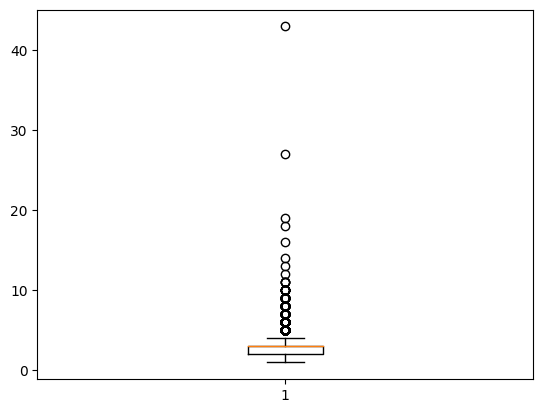

In [31]:
plt.boxplot(df['bhk'])
plt.show()

In [32]:
df[df['bhk']>20]

,area_type,availability,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


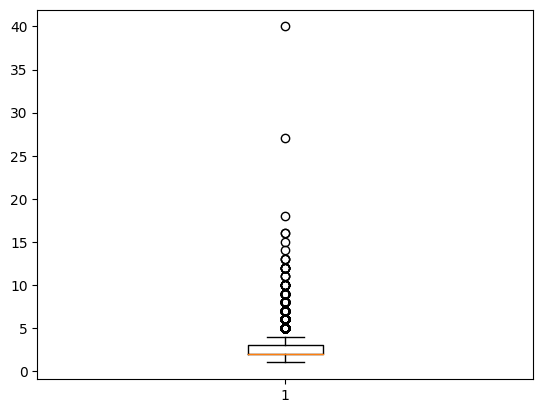

In [33]:
plt.boxplot(df['bath'])
plt.show()

In [34]:
#checking problamatic str values (ranges defined) in the total_sqft column

def check_str(val):
    try:
        float(val) 
    except:
        return True
    return False    

df[df['total_sqft'].apply(check_str)]

,area_type,availability,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1


In [35]:
def convert_range(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
        
df['total_sqft'] = df['total_sqft'].apply(convert_range)

In [36]:
df.isna().sum()

area_type        0
availability     0
location         0
size             0
total_sqft      46
bath             0
price            0
bhk              0
dtype: int64

In [37]:
df = df.dropna()

In [38]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
bhk             0
dtype: int64

In [ ]:
## feature eng

In [39]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [40]:
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13314     6530.612245
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
Name: price_per_sqft, Length: 12745, dtype: float64

In [41]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12745.00000,12745.000000,12745.000000,12745.000000,1.274500e+04
mean,1569.60368,2.703099,114.207350,2.815771,8.022896e+03
std,1259.83493,1.352340,151.591687,1.308425,1.086134e+05
min,1.00000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.00000,2.000000,50.000000,2.000000,4.298559e+03
50%,1280.00000,2.000000,73.000000,3.000000,5.482304e+03
75%,1691.00000,3.000000,120.000000,3.000000,7.398708e+03
max,52272.00000,40.000000,3600.000000,43.000000,1.200000e+07


In [42]:
df.location = df.location.apply(lambda x : x.strip())
loc_val = df['location'].value_counts()
loc_val

Whitefield                        522
Sarjapur  Road                    380
Electronic City                   289
Kanakpura Road                    247
Thanisandra                       231
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Kannur                              1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1288, dtype: int64

In [43]:
to_be_others = loc_val[loc_val.values<=10].index

In [44]:
df['location'] = df['location'].apply(lambda x: 'others' if x in to_be_others else x)

df['location'].value_counts()

others              2924
Whitefield           522
Sarjapur  Road       380
Electronic City      289
Kanakpura Road       247
                    ... 
Doddaballapur         11
LB Shastri Nagar      11
Tindlu                11
HAL 2nd Stage         11
Banjara Layout        11
Name: location, Length: 233, dtype: int64

In [ ]:
outlier detection Nd removal

In [ ]:
df.describe()

In [ ]:
df = df[df['total_sqft']/df['bhk']>=300]
df.describe()

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, val in df.groupby('location'):
        m = np.mean(val.price_per_sqft)
        std = np.std(val.price_per_sqft)

        gen_df = val[(val.price_per_sqft>=std-m) & (val.price_per_sqft<=std+m)]
        df_out = pd.concat([df_out,gen_df], ignore_index=True)

    return df_out

df = remove_pps_outliers(df)
df.describe()

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

In [ ]:
plot_scatter_chart(df,"Rajaji Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)
df.shape

In [ ]:
plot_scatter_chart(df,"Rajaji Nagar")

In [ ]:
df.drop(['size', 'price_per_sqft'], axis=1, inplace= True)

In [ ]:
df['availability'] = df['availability'].apply(lambda x: 1 if x=='Ready To Move' else 0)

In [ ]:
df.corr(numeric_only=True)['price']
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
X = df.drop(columns = ['price'])
y = df['price']

In [ ]:
## model building
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
step1 = ColumnTransformer(transformers=[
                         ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2])
                 ], remainder='passthrough')
step2 = StandardScaler() 
step3 = SVR()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))